In [148]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

# symboler
x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)


def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]
budsj=bud.subs(x_2,x_2_rel)

x_1_eq= sp.solve(budsj-m,x_1)[0]

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

nytte = U_max.subs([(a,.4),(b,.35),(m,2500),(p_1,25),(p_2,30)])
x_1_num = x_1_eq.subs([(a,.4),(b,.35),(m,2500),(p_1,25),(p_2,30)])
x_2_num = x_2_eq.subs([(a,.4),(b,.35),(m,2500),(p_1,25),(p_2,30)])



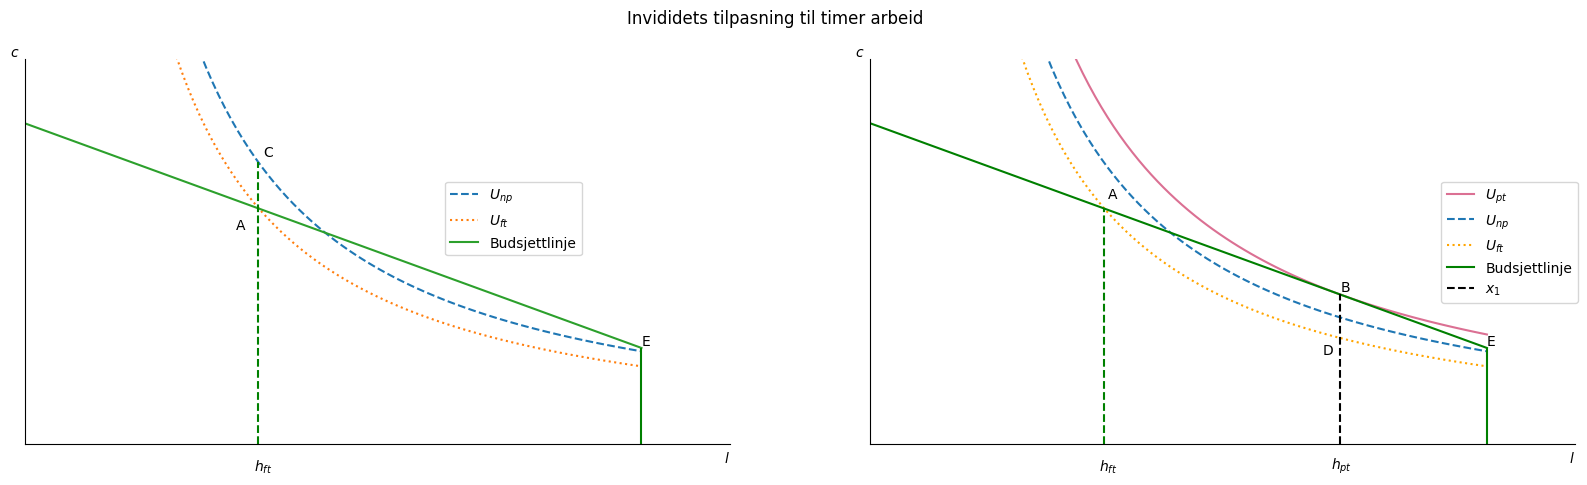

In [149]:
x = np.linspace(0.1,70,100)
fig, ax = plt.subplots(1,2, figsize=(20,5))

for i in range(2):

    ax[i].set_ylabel('$c$', loc='top', rotation=0)
    ax[i].set_xlabel('$l$', loc='right')
    ax[i].set(xlim=(0,80))
    ax[i].set(ylim=(0,100))
    ax[i].spines['top'].set_color('none')
    ax[i].spines['right'].set_color('none')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

# Indifference curves
#ax.plot(x, indiff_x_2(nytte,.4,.35,x), label='$U_{pt}$')
ax[0].plot(x, indiff_x_2(nytte-1,.4,.35,x), label='$U_{np}$', ls= '--')
ax[0].plot(x, indiff_x_2(nytte-2,.4,.35,x), label='$U_{ft}$', ls= 'dotted')
ax[0].plot(x, budsjett(2500, 25, 30, x), label = 'Budsjettlinje')


# Linje fra 70 timer til budsjettlinjen
ax[0].vlines(70,0,budsjett(2500, 25, 30, 70), color='green')
# Linje fra 30 timer på x-aksen til U_np
ax[0].vlines(26.5,0,indiff_x_2(nytte-1,.4,.35,26.5), color='green', ls='dashed')

# Setter inn bokstaven E hvor linjen treffer budsjettlinjen
ax[0].text(70,25,'E', horizontalalignment='left', verticalalignment='bottom')
# Setter inn bokstaven A som treffer hvor U_ft treffer budsjettlinjen
ax[0].text(24,55,'A', horizontalalignment='left', verticalalignment='bottom')
# Setter inn bokstaven C som treffer U_np
ax[0].text(27,74,'C', horizontalalignment='left', verticalalignment='bottom')

# Setter inn h_ft som krysser U_ft fra x_1_num
ax[0].text(26,-8,'$h_{ft}$', horizontalalignment='left', verticalalignment='bottom')



ax[1].plot(x, indiff_x_2(nytte,.4,.35,x), label='$U_{pt}$', color='palevioletred')
ax[1].plot(x, indiff_x_2(nytte-1,.4,.35,x), label='$U_{np}$', ls= 'dashed', color='#1f77b4')
ax[1].plot(x, indiff_x_2(nytte-2,.4,.35,x), label='$U_{ft}$', ls= 'dotted', color='orange')

ax[1].plot(x, budsjett(2500, 25, 30, x), label = 'Budsjettlinje', color='green')

ax[1].vlines(70,0,budsjett(2500, 25, 30, 70), color='green')
# Linje fra 27 timer på x-aksen til U_ft
ax[1].vlines(26.5,0,indiff_x_2(nytte-2,.4,.35,26.5), color='green', ls='dashed')

ax[1].text(70,25,'E', horizontalalignment='left', verticalalignment='bottom')

ax[1].text(27,63,'A', horizontalalignment='left', verticalalignment='bottom')

# tegn inn tilpasningen
ax[1].vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')

# legger til B
ax[1].text(x_1_num,x_2_num,'B', horizontalalignment='left', verticalalignment='bottom')
# legger til D som krysser U_ft fra x_1_num
ax[1].text(x_1_num-2,indiff_x_2(nytte-2,.4,.35,x_1_num+10),'D', horizontalalignment='left', verticalalignment='bottom')

ax[1].text(26,-8,'$h_{ft}$', horizontalalignment='left', verticalalignment='bottom')

# Setter inn h_pt som treffer budsjettlinjen i 
ax[1].text(x_1_num-1,-8,'$h_{pt}$', horizontalalignment='left', verticalalignment='bottom')
# tittel
fig.suptitle('Invididets tilpasning til timer arbeid')

ax[0].legend(bbox_to_anchor=(0.8,0.7))
ax[1].legend(bbox_to_anchor=(0.8,0.7))
plt.show()


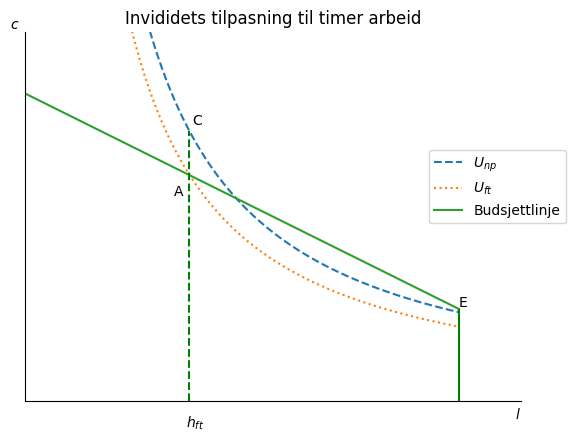

In [153]:
x = np.linspace(0.1,70,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$c$', loc='top', rotation=0)
                ax.set_xlabel('$l$', loc='right')
                ax.set(xlim=(0,80))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xticks([])
                ax.set_yticks([])
                
                return fig, ax
                
fig, ax = create_ax()

# Indifference curves
ax.plot(x, indiff_x_2(nytte-1,.4,.35,x), label='$U_{np}$', ls= '--')
ax.plot(x, indiff_x_2(nytte-2,.4,.35,x), label='$U_{ft}$', ls= 'dotted')
ax.plot(x, budsjett(2500, 25, 30, x), label = 'Budsjettlinje')


# Linje fra 70 timer til budsjettlinjen
ax.vlines(70,0,budsjett(2500, 25, 30, 70), color='green')
# Linje fra 30 timer på x-aksen til U_np
ax.vlines(26.5,0,indiff_x_2(nytte-1,.4,.35,26.5), color='green', ls='dashed')

# Setter inn bokstaven E hvor linjen treffer budsjettlinjen
ax.text(70,25,'E', horizontalalignment='left', verticalalignment='bottom')
# Setter inn bokstaven A som treffer hvor U_ft treffer budsjettlinjen
ax.text(24,55,'A', horizontalalignment='left', verticalalignment='bottom')
# Setter inn bokstaven C som treffer U_np
ax.text(27,74,'C', horizontalalignment='left', verticalalignment='bottom')

# Setter inn h_ft som krysser U_ft fra x_1_num
ax.text(26,-8,'$h_{ft}$', horizontalalignment='left', verticalalignment='bottom')

ax.set_title('Invididets tilpasning til timer arbeid')

ax.legend(bbox_to_anchor=(0.8,0.7))

plt.show()

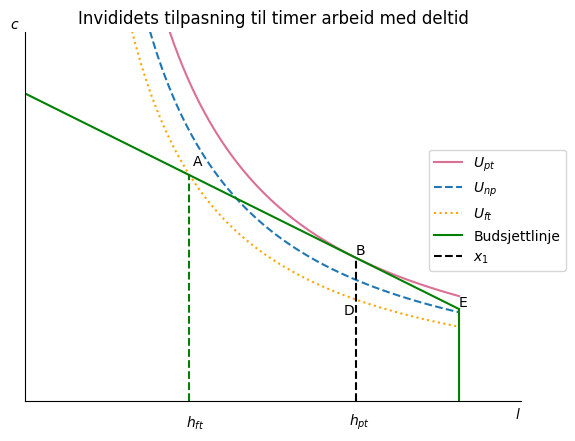

In [156]:
fig, ax = create_ax()

ax.plot(x, indiff_x_2(nytte,.4,.35,x), label='$U_{pt}$', color='palevioletred')
ax.plot(x, indiff_x_2(nytte-1,.4,.35,x), label='$U_{np}$', ls= 'dashed', color='#1f77b4')
ax.plot(x, indiff_x_2(nytte-2,.4,.35,x), label='$U_{ft}$', ls= 'dotted', color='orange')

ax.plot(x, budsjett(2500, 25, 30, x), label = 'Budsjettlinje', color='green')

ax.vlines(70,0,budsjett(2500, 25, 30, 70), color='green')
# Linje fra 27 timer på x-aksen til U_ft
ax.vlines(26.5,0,indiff_x_2(nytte-2,.4,.35,26.5), color='green', ls='dashed')

ax.text(70,25,'E', horizontalalignment='left', verticalalignment='bottom')

ax.text(27,63,'A', horizontalalignment='left', verticalalignment='bottom')

# tegn inn tilpasningen
ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')

# legger til B
ax.text(x_1_num,x_2_num,'B', horizontalalignment='left', verticalalignment='bottom')
# legger til D som krysser U_ft fra x_1_num
ax.text(x_1_num-2,indiff_x_2(nytte-2,.4,.35,x_1_num+10),'D', horizontalalignment='left', verticalalignment='bottom')

ax.text(26,-8,'$h_{ft}$', horizontalalignment='left', verticalalignment='bottom')

# Setter inn h_pt som treffer budsjettlinjen i 
ax.text(x_1_num-1,-8,'$h_{pt}$', horizontalalignment='left', verticalalignment='bottom')
# tittel
ax.set_title('Invididets tilpasning til timer arbeid med deltid')

ax.legend(bbox_to_anchor=(0.8,0.7))

plt.show()